In [133]:
import kagglehub

kagglehub.dataset_download("aungpyaeap/supermarket-sales")

'/Users/samuelarthur/.cache/kagglehub/datasets/aungpyaeap/supermarket-sales/versions/3'

In [134]:
import pandas as pd

df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [135]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Attribute information
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Dataset Overview:
This is a historical sales dataset from a supermarket company with three branches. 
Let's break down the key aspects:

Time Period:
Data spans from January to March 2019
Contains daily transaction records

Geographical Coverage:
Three branches: Yangon (Branch A), Mandalay (Branch B), and Naypyitaw (Branch C)

Key Variables:
Customer-Related:

Customer type (Member/Normal)
- Gender (Male/Female)
- Payment method (Cash/Card/E-wallet)
- Customer rating (1-10 scale)


Product-Related:

Product line (6 categories):

- Electronic accessories
- Fashion accessories
- Food and beverages
- Health and beauty
- Home and lifestyle
- Sports and travel

Unit price
- Quantity purchased

Financial Metrics:
- Gross margin percentage
- Gross income
- Tax (5%)
- Total


Potential Analysis Goals:

Sales Performance Analysis:

- Compare performance across branches
- Identify best-selling product categories
- Analyze sales trends over time


Customer Behavior:

- Study purchase patterns between member vs normal customers
- Analyze gender-based purchasing preferences
- Evaluate payment method preferences

Financial Analysis:

- Calculate profitability by product line
- Analyze gross margin patterns
- Study transaction values

Customer Satisfaction:

- Analyze rating patterns across different variables
- Identify factors affecting customer satisfaction

In [136]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [137]:
isnull = df.isnull().sum()
print(f"Number of null values: {isnull.sum()}")

Number of null values: 0


In [138]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [139]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [140]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Convert 'Time' to datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [141]:
df.loc[:,["Date", "Time"]]


,Date,Time
0,2019-01-05,13:08:00
1,2019-03-08,10:29:00
2,2019-03-03,13:23:00
3,2019-01-27,20:33:00
4,2019-02-08,10:37:00
...,...,...
995,2019-01-29,13:46:00
996,2019-03-02,17:16:00
997,2019-02-09,13:22:00
998,2019-02-22,15:33:00


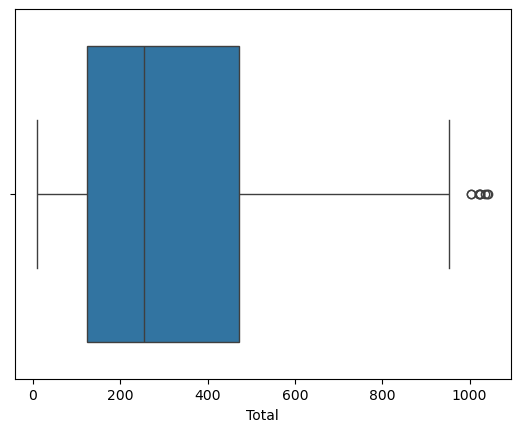

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

#checking for outliers
sns.boxplot(x=df['Total'])
plt.show()

In [143]:
df.groupby('Product line')['Total'].describe()


,count,mean,std,min,25%,50%,75%,max
Product line,,,,,,,,
Electronic accessories,170.0,319.632538,245.945626,26.7225,118.503000,241.21650,475.823250,942.4485
Fashion accessories,178.0,305.089298,243.564130,12.6945,106.155000,211.64850,442.690500,1042.6500
Food and beverages,174.0,322.671517,247.157780,22.6590,134.904000,252.48825,452.647125,1034.4600
Health and beauty,152.0,323.643020,237.538815,18.6375,125.666625,272.30700,492.720375,950.2500
Home and lifestyle,160.0,336.636956,254.600671,14.6790,126.076125,258.18975,491.762250,1023.7500
Sports and travel,166.0,332.065220,248.375328,10.6785,133.260750,270.93150,477.684375,1002.1200


In [144]:
print("Mean:", df['Total'].mean())
print("Median:", df['Total'].median())


Mean: 322.966749
Median: 253.848


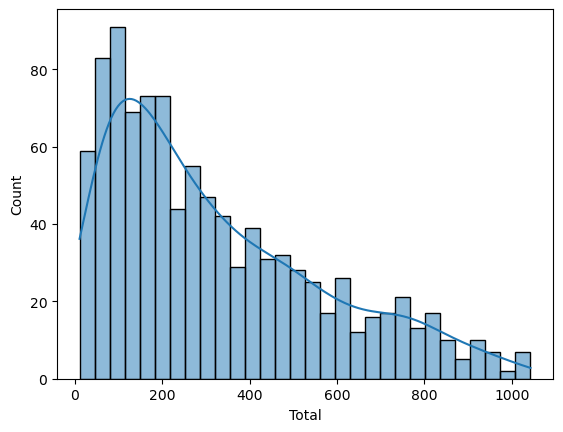

In [145]:
sns.histplot(df['Total'], bins=30, kde=True)
plt.show()


Based on the results:

Outliers Across Product Lines:

The max Total values are significantly higher than the 75th percentile for all product lines (e.g., 1042.65 for "Fashion accessories" vs 442.69 at 75%).
This suggests that outliers represent unusually large transactions, which appear legitimate and not errors.
Impact on Mean and Median:

The overall mean of 322.97 is much higher than the median of 253.85.
This confirms that the outliers are skewing the distribution towards higher values.
Distribution Shape:

The histogram shows a right-skewed distribution, indicating that most transactions are small or moderate, while a few transactions have extremely high totals.

Actions to take:

Keep the Outliers:

Since the outliers are consistent across product lines and likely represent high-value purchases, they are important insights for business analysis (e.g., identifying big spenders, bulk orders).
Separate Analysis:

Analyze these outliers separately to understand:
Which product lines contribute to the high totals.
Patterns of large transactions (e.g., frequent customers, time of purchase).

In [146]:
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -395.9694375, Upper Bound: 991.7420625


In [147]:
outliers = df[df['Total'] > upper_bound]
print(outliers.shape)

(9, 17)


In [148]:
outliers_by_product = outliers.groupby('Product line')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_product)

                     count        mean      max
Product line                                   
Fashion accessories      3  1034.21500  1042.65
Food and beverages       1  1034.46000  1034.46
Home and lifestyle       4  1018.05375  1023.75
Sports and travel        1  1002.12000  1002.12


In [149]:
outliers_by_customer = outliers.groupby('Customer type')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_customer)

               count       mean      max
Customer type                           
Member             3  1032.6050  1042.65
Normal             6  1018.9375  1039.29


In [150]:
outliers_by_time = outliers.groupby('Time')['Total'].sum().sort_values(ascending=False)
print(outliers_by_time.head(10))  # Top times with high-value transactions

Time
14:53:00    1042.650
16:20:00    1039.290
20:23:00    1034.460
16:18:00    1023.750
17:16:00    1022.490
13:48:00    1022.385
13:00:00    1020.705
13:32:00    1003.590
13:45:00    1002.120
Name: Total, dtype: float64


In [151]:
outliers_by_date = outliers.groupby('Date')['Total'].sum().sort_values(ascending=False)
print(outliers_by_date.head(10))  # Top dates with high-value transactions

Date
2019-02-08    2059.995
2019-02-15    1042.650
2019-01-30    1034.460
2019-01-12    1023.750
2019-03-02    1022.490
2019-01-15    1022.385
2019-01-16    1003.590
2019-01-09    1002.120
Name: Total, dtype: float64


In [152]:
outliers_by_payment = outliers.groupby('Payment')['Total'].agg(['count', 'mean', 'max'])
print(outliers_by_payment)

             count       mean      max
Payment                               
Cash             2  1002.8550  1003.59
Credit card      4  1031.2575  1042.65
Ewallet          3  1026.9000  1034.46


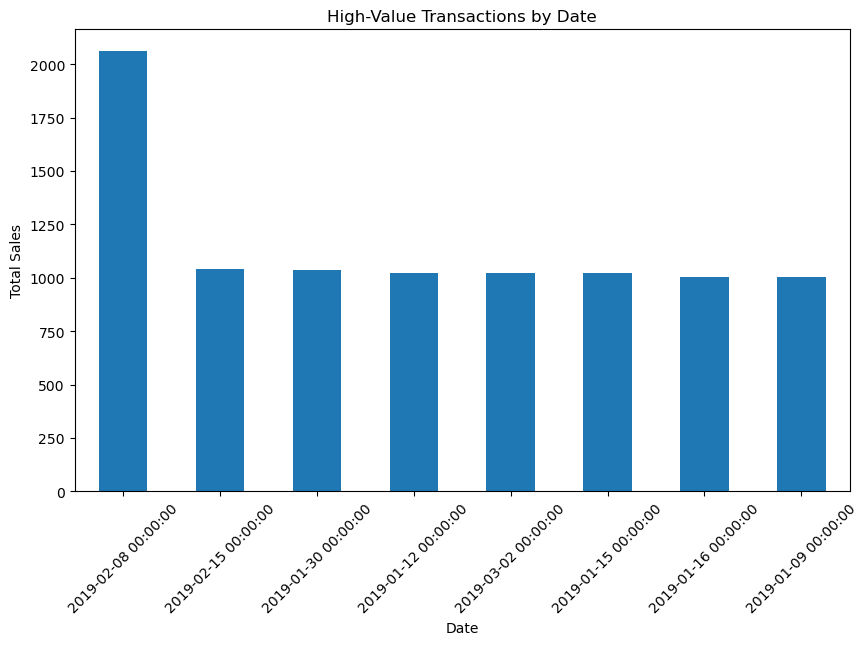

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
outliers_by_date.plot(kind='bar')
plt.title("High-Value Transactions by Date")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

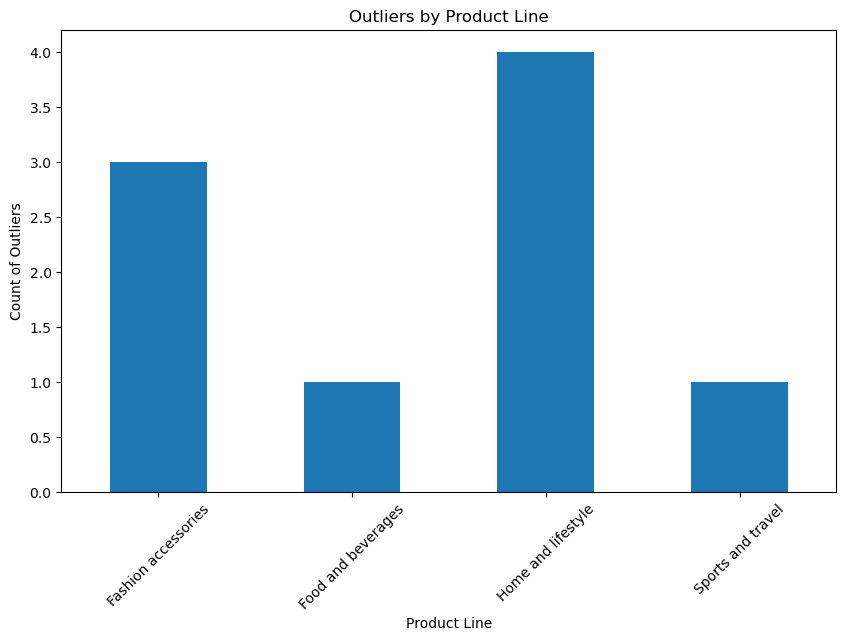

In [154]:
plt.figure(figsize=(10, 6))
outliers_by_product['count'].plot(kind='bar')
plt.title("Outliers by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45)
plt.show()


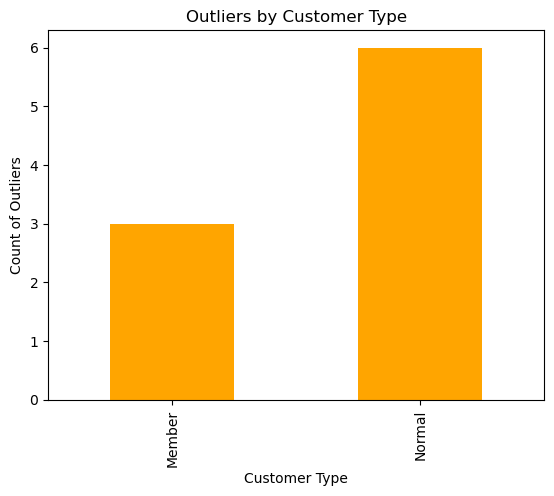

In [155]:
outliers_by_customer['count'].plot(kind='bar', color='orange')
plt.title("Outliers by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Count of Outliers")
plt.show()


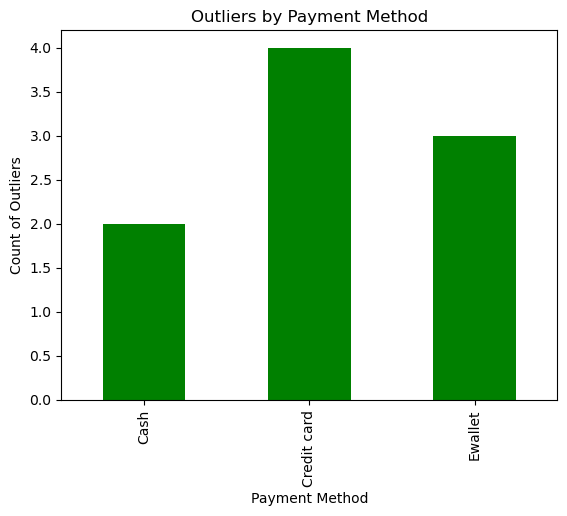

In [156]:
outliers_by_payment['count'].plot(kind='bar', color='green')
plt.title("Outliers by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count of Outliers")
plt.show()


Insights Gained from Outlier Analysis
1. Product Line Contribution:

Outliers are concentrated in specific product lines:
- Home and Lifestyle (4 outliers, highest count).
- Fashion Accessories (3 outliers).
- Food and Beverages and Sports and Travel contribute fewer outliers (1 each).

These results suggest that high-value transactions are more frequent in "Home and Lifestyle" and "Fashion Accessories."

2. Customer Type Contribution:

Outliers occur more often for Normal customers (6 outliers) compared to Members (3 outliers).
Normal customers appear to make larger purchases, possibly indicating sporadic but significant spending behavior.

3. Transaction Time Analysis:

High-value transactions are clustered during specific times:
- Top Times: 14:53, 16:20, 20:23.

These times suggest peak hours where larger purchases are made, potentially during shopping rush hours.

4. Transaction Date Analysis:

Key dates with the highest high-value transactions include:
- 2019-02-08: Total sales of 2059.99.
Other notable dates include 2019-02-15, 2019-01-30, and 2019-03-02.

These dates might correlate with promotions, holidays, or seasonal sales events.

5. Payment Method Contribution:

Outliers are distributed across payment methods as follows:
- Credit Card: 4 transactions.
- E-wallet: 3 transactions.
- Cash: 2 transactions.

Credit cards and E-wallets are the dominant methods for high-value purchases, likely due to convenience and higher spending limits.

Conclusion

From the analysis:
- High-value transactions are dominantly in the "Home and Lifestyle" and "Fashion Accessories" product lines.
- Normal customers contribute to the majority of outliers, suggesting significant one-time purchases.
- High-value purchases peak at specific times (afternoons and evenings) and occur on specific dates, likely linked to promotions or seasonal trends.
- Credit card and E-wallet payments are the most common for outliers, highlighting the reliance on digital payment methods for larger purchases.

Recommendations:
- Investigate promotions or campaigns around key dates and product lines to understand drivers of high-value transactions.
- Focus on "Home and Lifestyle" and "Fashion Accessories" for upselling opportunities.
- Consider targeting Normal customers with loyalty programs to increase repeat purchases.
- Optimize store operations during peak hours to accommodate large transactions efficiently.
- Promote digital payment options (Credit cards and E-wallets) for higher-value purchases.

In [157]:
# Ensure numerical columns are of appropriate types
numeric_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 
               'gross margin percentage', 'gross income', 'Rating']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df[numeric_cols]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [158]:
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender',
                    'Product line', 'Payment']

df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.title())

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Branch: ['A' 'C' 'B']
City: ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type: ['Member' 'Normal']
Gender: ['Female' 'Male']
Product line: ['Health And Beauty' 'Electronic Accessories' 'Home And Lifestyle'
 'Sports And Travel' 'Food And Beverages' 'Fashion Accessories']
Payment: ['Ewallet' 'Cash' 'Credit Card']


### Feature Engineering

In [159]:
# Create 'Total without Tax'
df['Total without Tax'] = df['Total'] - df['Tax 5%']
df[['Total', 'Tax 5%', 'Total without Tax']]

,Total,Tax 5%,Total without Tax
0,548.9715,26.1415,522.83
1,80.2200,3.8200,76.40
2,340.5255,16.2155,324.31
3,489.0480,23.2880,465.76
4,634.3785,30.2085,604.17
...,...,...,...
995,42.3675,2.0175,40.35
996,1022.4900,48.6900,973.80
997,33.4320,1.5920,31.84
998,69.1110,3.2910,65.82


In [160]:
df['Tax 5%'].sum()

15379.368999999999

In [161]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
print(monthly_sales)


   Month       Total
0      1  116291.868
1      2   97219.374
2      3  109455.507


In [162]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.minute

print(df[['Time', 'Hour', 'Minute']].head())


       Time  Hour  Minute
0  13:08:00    13       8
1  10:29:00    10      29
2  13:23:00    13      23
3  20:33:00    20      33
4  10:37:00    10      37


In [163]:
df['DayOfWeek'] = df['Date'].dt.day_name()

df[['Date', 'DayOfWeek']].head()


,Date,DayOfWeek
0,2019-01-05,Saturday
1,2019-03-08,Friday
2,2019-03-03,Sunday
3,2019-01-27,Sunday
4,2019-02-08,Friday


### Encoding Categorical Variables


In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode 'Customer type'
df['CustomerType_Encoded'] = le.fit_transform(df['Customer type'])

df[['Customer type', 'CustomerType_Encoded']].drop_duplicates()


,Customer type,CustomerType_Encoded
0,Member,0
1,Normal,1


In [165]:
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Payment', 'Product line', 'City', 'Gender', 'Branch'], drop_first=True)

df_encoded.head()


,Invoice ID,Customer type,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,...,Product line_Fashion Accessories,Product line_Food And Beverages,Product line_Health And Beauty,Product line_Home And Lifestyle,Product line_Sports And Travel,City_Naypyitaw,City_Yangon,Gender_Male,Branch_B,Branch_C
0,750-67-8428,Member,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,522.83,4.761905,...,False,False,True,False,False,False,True,False,False,False
1,226-31-3081,Normal,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,76.40,4.761905,...,False,False,False,False,False,True,False,False,False,True
2,631-41-3108,Normal,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,324.31,4.761905,...,False,False,False,True,False,False,True,True,False,False
3,123-19-1176,Member,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,465.76,4.761905,...,False,False,True,False,False,False,True,True,False,False
4,373-73-7910,Normal,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,604.17,4.761905,...,False,False,False,False,True,False,True,True,False,False


In [166]:
df_encoded.columns

Index(['Invoice ID', 'Customer type', 'Unit price', 'Quantity', 'Tax 5%',
       'Total', 'Date', 'Time', 'cogs', 'gross margin percentage',
       'gross income', 'Rating', 'Total without Tax', 'Month', 'Hour',
       'Minute', 'DayOfWeek', 'CustomerType_Encoded', 'Payment_Credit Card',
       'Payment_Ewallet', 'Product line_Fashion Accessories',
       'Product line_Food And Beverages', 'Product line_Health And Beauty',
       'Product line_Home And Lifestyle', 'Product line_Sports And Travel',
       'City_Naypyitaw', 'City_Yangon', 'Gender_Male', 'Branch_B', 'Branch_C'],
      dtype='object')

In [167]:
# Define transaction size based on 'Total'
def categorize_transaction(total):
    if total < 200:
        return 'Small'
    elif 200 <= total < 500:
        return 'Medium'
    else:
        return 'Large'

df['Transaction Size'] = df['Total'].apply(categorize_transaction)
df[['Total', 'Transaction Size']]


,Total,Transaction Size
0,548.9715,Large
1,80.2200,Small
2,340.5255,Medium
3,489.0480,Medium
4,634.3785,Large
...,...,...
995,42.3675,Small
996,1022.4900,Large
997,33.4320,Small
998,69.1110,Small


### Exploratory Data Analysis (EDA)

In [168]:
df['Transaction Size'].value_counts()

Transaction Size
Small     410
Medium    363
Large     227
Name: count, dtype: int64

In [169]:
# Aggregate sales by branch
sales_per_branch = df.groupby('Branch')['Total'].sum().reset_index()
sales_per_branch

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/4160526405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Total', data=sales_per_branch, palette='viridis')


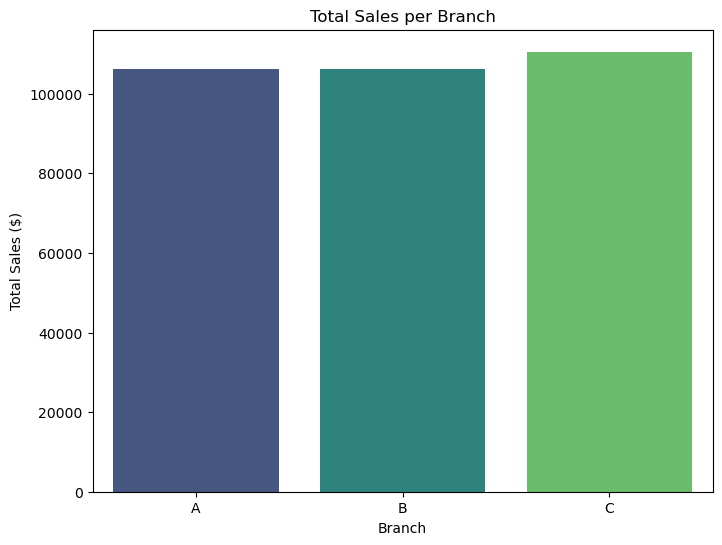

In [170]:
# Bar plot for sales per branch
plt.figure(figsize=(8,6))
sns.barplot(x='Branch', y='Total', data=sales_per_branch, palette='viridis')
plt.title('Total Sales per Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales ($)')
plt.show()

In [171]:
# Aggregate quantity by product line
quantity_per_product = df.groupby('Product line')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
quantity_per_product

,Product line,Quantity
0,Electronic Accessories,971
2,Food And Beverages,952
5,Sports And Travel,920
4,Home And Lifestyle,911
1,Fashion Accessories,902
3,Health And Beauty,854


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/399378452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Product line', data=quantity_per_product, palette='magma')


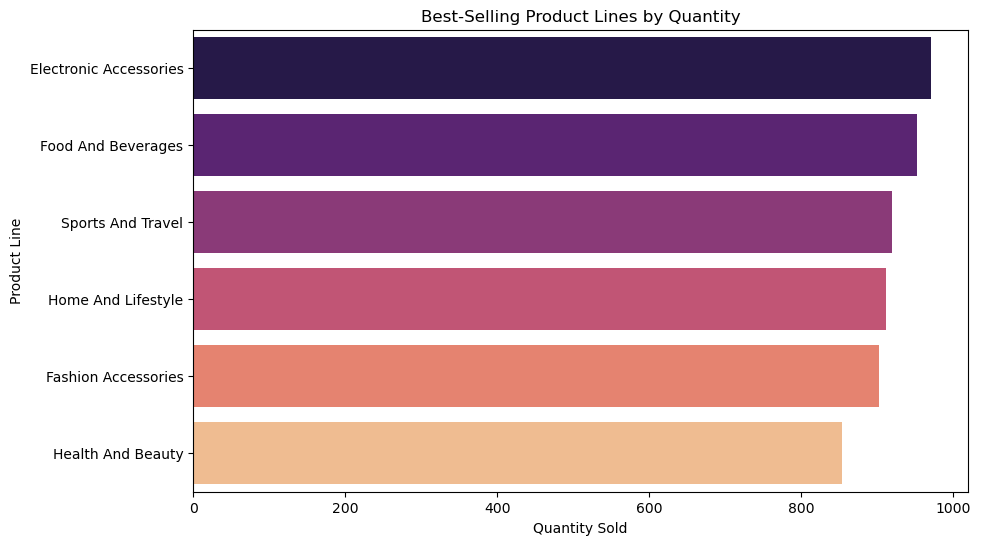

In [172]:
# Horizontal bar plot for best-selling product lines
plt.figure(figsize=(10,6))
sns.barplot(x='Quantity', y='Product line', data=quantity_per_product, palette='magma')
plt.title('Best-Selling Product Lines by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Line')
plt.show()

In [173]:
# Extract month from 'Date'
df['Month'] = df['Date'].dt.month_name()

# Aggregate sales by month
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

from pandas.api.types import CategoricalDtype

month_order = ['January', 'February', 'March']
month_type = CategoricalDtype(categories=month_order, ordered=True)
df['Month'] = df['Month'].astype(month_type)

monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
monthly_sales

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/2546549695.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('Month')['Total'].sum().reset_index()


,Month,Total
0,January,116291.868
1,February,97219.374
2,March,109455.507


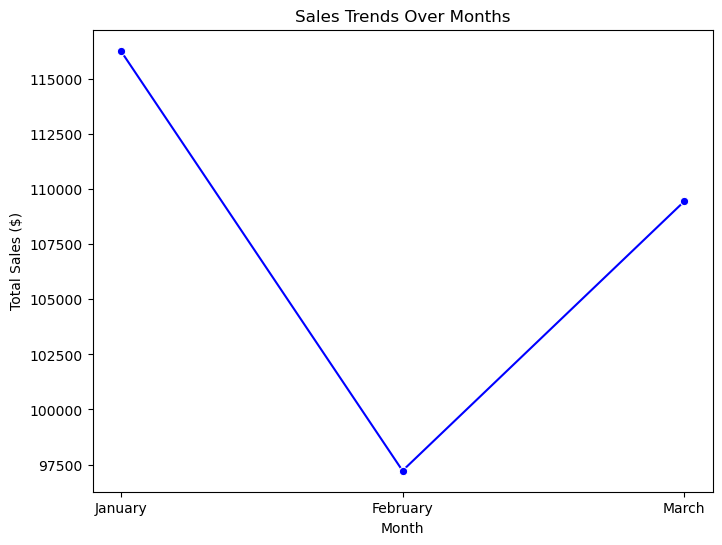

In [174]:
# Line plot for monthly sales trends
plt.figure(figsize=(8,6))
sns.lineplot(x='Month', y='Total', data=monthly_sales, marker='o', color='blue')
plt.title('Sales Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

### Customer Behavior Analysis

In [175]:
# Aggregate sales by customer type
customer_sales = df.groupby('Customer type')['Total'].sum().reset_index()
customer_sales

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


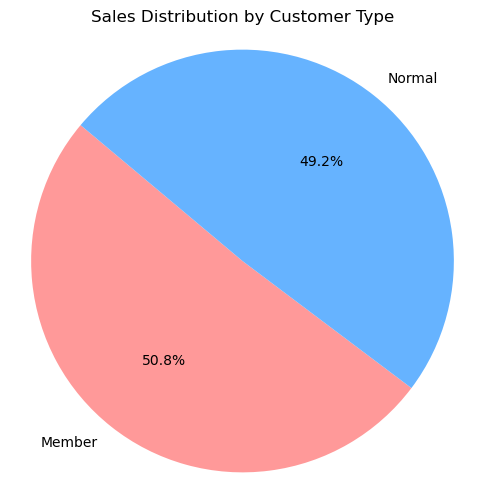

In [176]:
# Pie chart for sales by customer type
plt.figure(figsize=(6,6))
plt.pie(customer_sales['Total'], labels=customer_sales['Customer type'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Sales Distribution by Customer Type')
plt.axis('equal')
plt.show()

In [177]:
# Aggregate sales by gender
gender_sales = df.groupby('Gender')['Total'].sum().reset_index()
gender_sales

,Gender,Total
0,Female,167882.925
1,Male,155083.824


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/2650514161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total', data=gender_sales, palette='pastel')


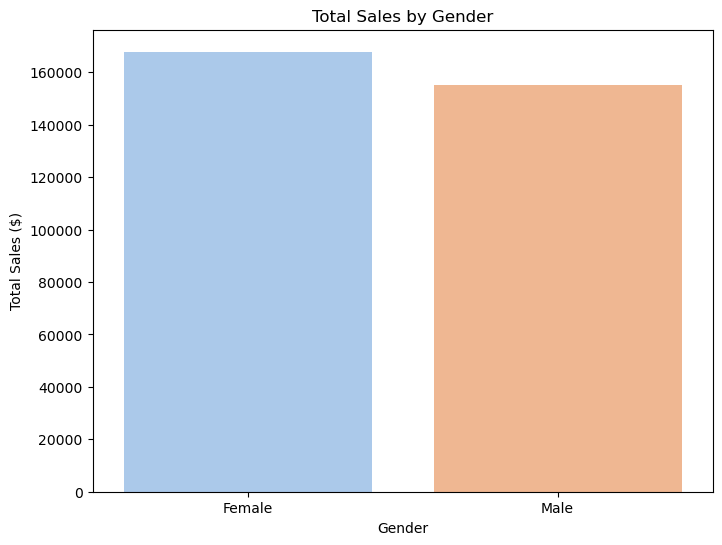

In [178]:
# Bar plot for sales by gender
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Total', data=gender_sales, palette='pastel')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales ($)')
plt.show()

In [179]:
# Count transactions by payment method
payment_counts = df['Payment'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']
payment_counts

,Payment Method,Count
0,Ewallet,345
1,Cash,344
2,Credit Card,311


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/302201194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment', data=df, palette='Set2')


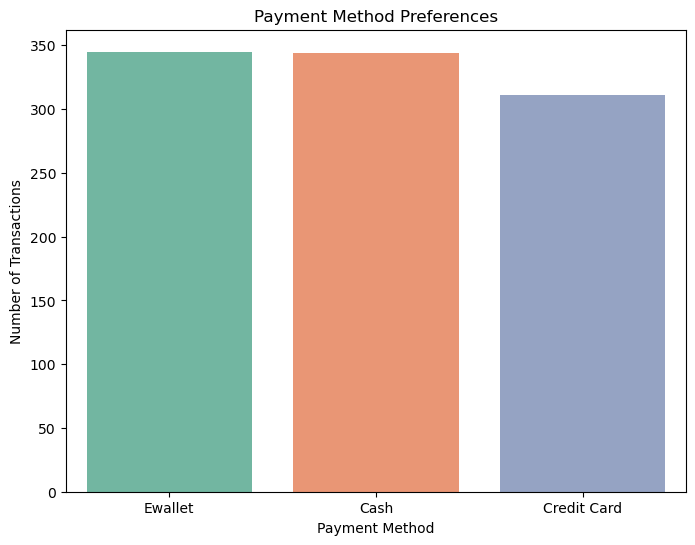

In [180]:
# Count plot for payment methods
plt.figure(figsize=(8,6))
sns.countplot(x='Payment', data=df, palette='Set2')
plt.title('Payment Method Preferences')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

In [181]:
# Aggregate gross income by product line
profit_per_product = df.groupby('Product line')['gross income'].sum().reset_index().sort_values(by='gross income', ascending=False)
profit_per_product

,Product line,gross income
2,Food And Beverages,2673.5640
5,Sports And Travel,2624.8965
0,Electronic Accessories,2587.5015
1,Fashion Accessories,2585.9950
4,Home And Lifestyle,2564.8530
3,Health And Beauty,2342.5590


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/3230420802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gross income', y='Product line', data=profit_per_product, palette='coolwarm')


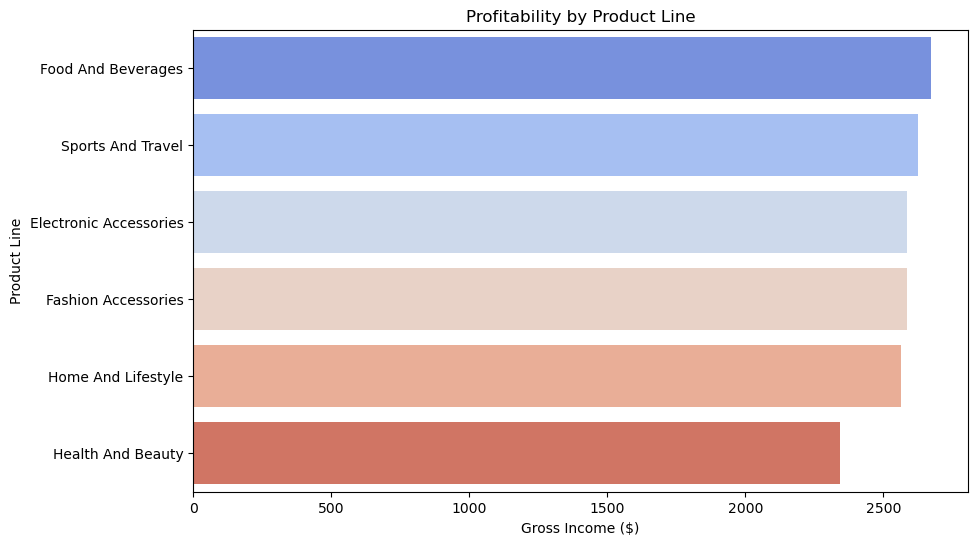

In [182]:
# Bar plot for profitability by product line
plt.figure(figsize=(10,6))
sns.barplot(x='gross income', y='Product line', data=profit_per_product, palette='coolwarm')
plt.title('Profitability by Product Line')
plt.xlabel('Gross Income ($)')
plt.ylabel('Product Line')
plt.show()


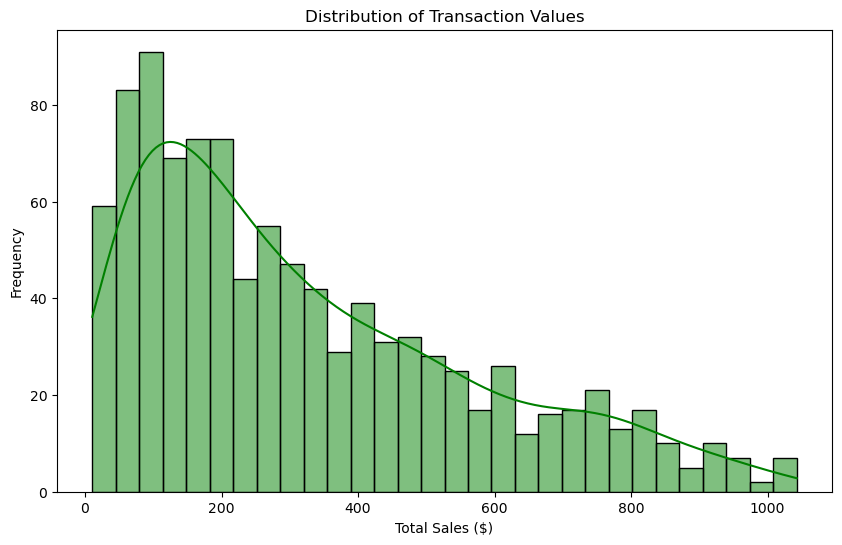

In [183]:
#Plot the distribution of transaction values.

# Histogram with KDE for 'Total'
plt.figure(figsize=(10,6))
sns.histplot(df['Total'], bins=30, kde=True, color='green')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Sales ($)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Aggregate sales by day of the week
sales_by_day = df.groupby('DayOfWeek')['Total'].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = CategoricalDtype(categories=day_order, ordered=True)
df['DayOfWeek'] = df['DayOfWeek'].astype(day_type)

sales_by_day = df.groupby('DayOfWeek')['Total'].sum().reset_index()
sales_by_day

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/4234913340.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_day = df.groupby('DayOfWeek')['Total'].sum().reset_index()


,DayOfWeek,Total
0,Monday,37899.0780
1,Tuesday,51482.2455
2,Wednesday,43731.1350
3,Thursday,45349.2480
4,Friday,43926.3405
5,Saturday,56120.8095
6,Sunday,44457.8925


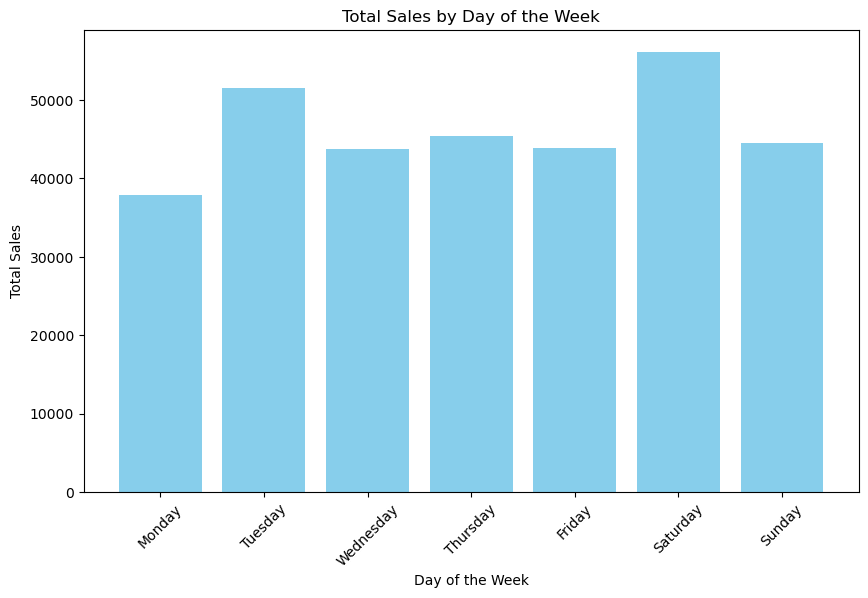

In [185]:
sales_by_day['DayOfWeek'] = pd.Categorical(sales_by_day['DayOfWeek'],
                                           categories=['Monday', 'Tuesday', 'Wednesday', 
                                                       'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                           ordered=True)
sales_by_day = sales_by_day.sort_values('DayOfWeek')

plt.figure(figsize=(10, 6))
plt.bar(sales_by_day['DayOfWeek'], sales_by_day['Total'], color='skyblue')

plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')

plt.xticks(rotation=45)
plt.show()

Summary of Visualizations

Total Sales by Branch
- Branch C recorded the highest total sales, followed closely by Branch B and then Branch A. The difference is relatively small.
Best-Selling Product Lines by Quantity
- Electronic Accessories is the best-selling product line, while Health and Beauty is the lowest-performing in terms of quantity sold.
Sales Trends Over Months
- Sales peaked in January, dropped significantly in February, and began to recover in March. This suggests a need to analyze seasonal or monthly factors causing the dip in February.
Sales Distribution by Customer Type
- Customer types are almost evenly distributed with "Member" contributing slightly more (50.8%) compared to "Normal" customers (49.2%).
Total Sales by Gender
- Female customers contributed more to total sales compared to Male customers, although the difference is moderate.
Payment Method Preferences
- The most preferred payment methods are Ewallet and Cash, while Credit Card transactions are fewer.
Profitability by Product Line
- Health and Beauty generates the highest gross income, followed by Home and Lifestyle. Food and Beverages is relatively less profitable despite higher sales quantities.
Distribution of Transaction Values
- The majority of transactions fall in the lower range of total sales (below $400), and there is a gradual decline in frequency as transaction values increase.
Total Sales by Day of the Week
- Saturday saw the highest total sales, while Monday recorded the lowest sales. This indicates a peak in weekend shopping activity.

Conclusions
- Branch Insights: All three branches (A, B, C) perform well with minor differences in total sales. Strategies can focus on equal support for all branches.
- Product Line Analysis: While Electronic Accessories sells the most units, Health and Beauty is the most profitable, indicating a higher margin.
- Sales Trends: The decline in February may require further investigation into external factors such as promotions, seasonality, or economic conditions.
- Customer Behavior: "Member" customers slightly outperform "Normal" customers in sales contribution. Retention strategies for Members can be beneficial.
- Payment Preferences: Focusing on Ewallet and Cash payment options can enhance user convenience.
- Day of the Week: Saturday emerges as the best day for sales, suggesting that weekend promotions could be optimized.

#### Customer Satisfaction Analysis

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/1478609932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product line', y='Rating', data=df, palette='Set3')


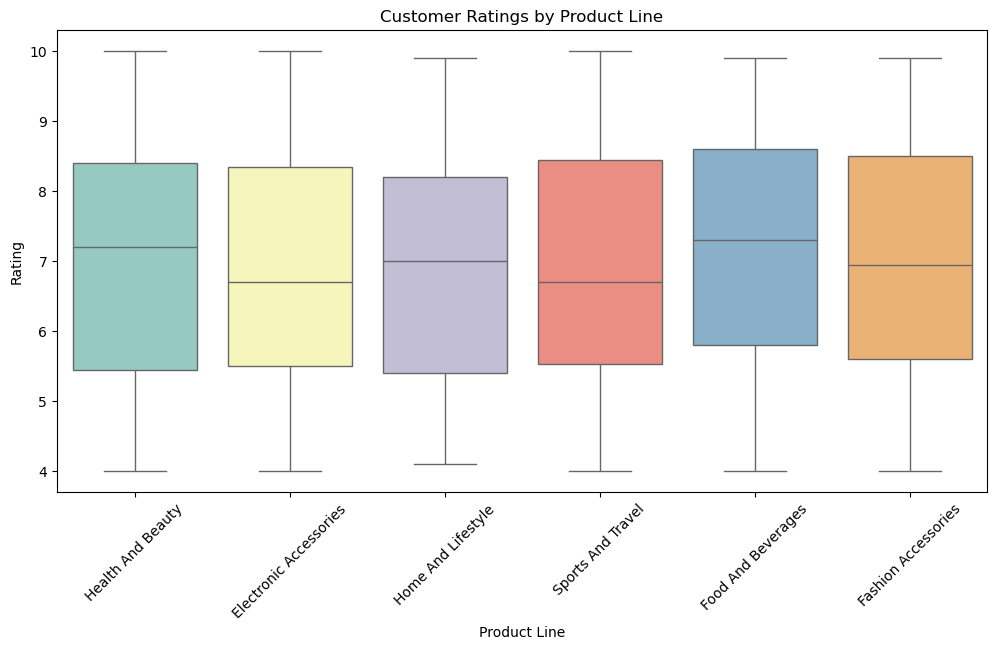

In [186]:
# Ratings by Product Line

# Box plot for ratings by product line
plt.figure(figsize=(12,6))
sns.boxplot(x='Product line', y='Rating', data=df, palette='Set3')
plt.title('Customer Ratings by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/3328437269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment', y='Rating', data=df, palette='Set2')


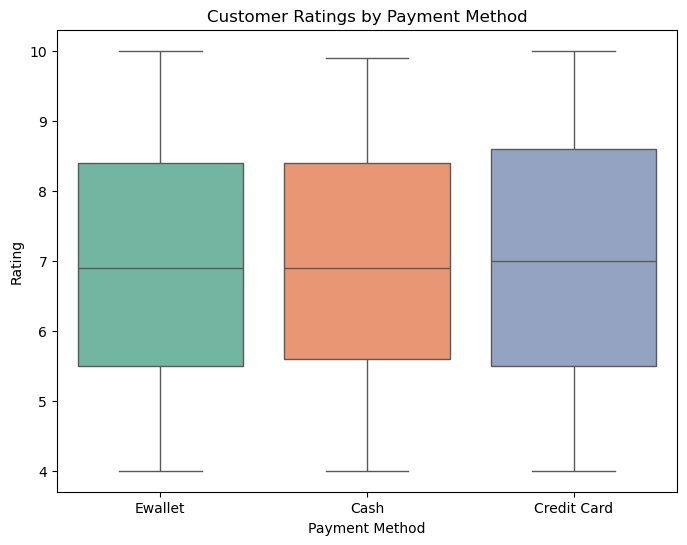

In [187]:
#Ratings by Payment Method

# Box plot for ratings by payment method
plt.figure(figsize=(8,6))
sns.boxplot(x='Payment', y='Rating', data=df, palette='Set2')
plt.title('Customer Ratings by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Rating')
plt.show()

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/550295177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer type', y='Rating', data=df, palette='Pastel1')


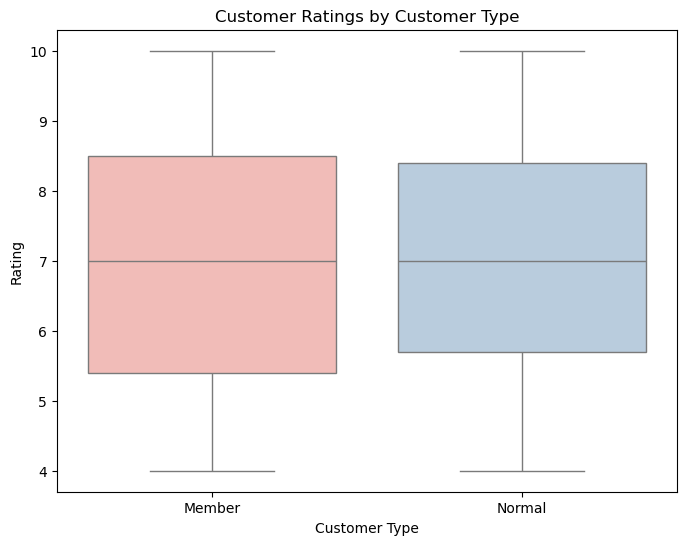

In [188]:
#Ratings by Customer Type

# Box plot for ratings by customer type
plt.figure(figsize=(8,6))
sns.boxplot(x='Customer type', y='Rating', data=df, palette='Pastel1')
plt.title('Customer Ratings by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Rating')
plt.show()

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/2514867792.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_month = df.groupby('Month')['Rating'].mean().reset_index()
/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/2514867792.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Rating', data=average_ratings_month, palette='viridis')


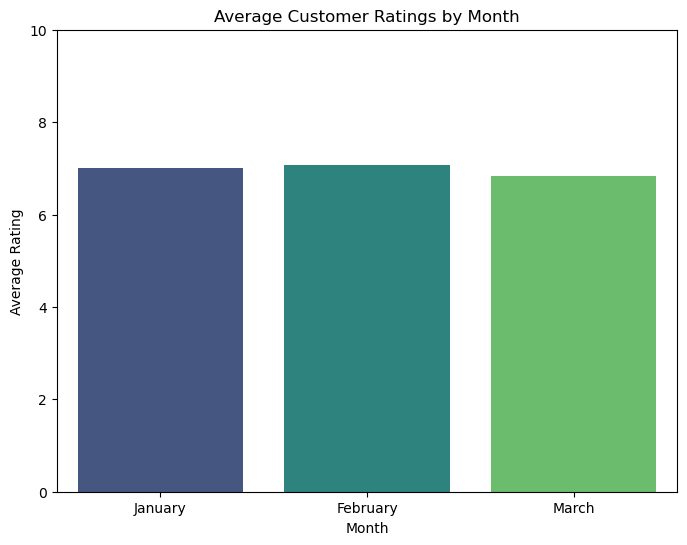

,Month,Rating
0,January,7.017614
1,February,7.071287
2,March,6.840290


In [189]:
# Aggregate average ratings by month
average_ratings_month = df.groupby('Month')['Rating'].mean().reset_index()

average_ratings_month['Month'] = pd.Categorical(average_ratings_month['Month'], 
                                               categories=['January', 'February', 'March'], 
                                               ordered=True)
average_ratings_month = average_ratings_month.sort_values('Month')

plt.figure(figsize=(8,6))
sns.barplot(x='Month', y='Rating', data=average_ratings_month, palette='viridis')
plt.title('Average Customer Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.show()

average_ratings_month

In [190]:
# Aggregate sales and ratings by month
monthly_metrics = df.groupby('Month').agg({
    'Total': 'sum',
    'Rating': 'mean',
    'Unit price': 'mean',
    'Quantity': 'mean',
    'gross income': 'sum'
}).reset_index()

print(monthly_metrics)


      Month       Total    Rating  Unit price  Quantity  gross income
0   January  116291.868  7.017614   56.119006  5.582386      5537.708
1  February   97219.374  7.071287   56.632079  5.458746      4629.494
2     March  109455.507  6.840290   54.373101  5.481159      5212.167


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/2986398647.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_metrics = df.groupby('Month').agg({


Insights to Look For:

- Was there a significant drop in sales volume or revenue in March?
- Did the average transaction size change?

In [191]:
# Sales and ratings by product line and month
product_month = df.groupby(['Month', 'Product line']).agg({
    'Total': 'sum',
    'Rating': 'mean'
}).reset_index()

print(product_month)


       Month            Product line       Total    Rating
0    January  Electronic Accessories  18831.2880  7.142593
1    January     Fashion Accessories  19345.1160  7.060937
2    January      Food And Beverages  19570.5300  7.405357
3    January       Health And Beauty  16383.1710  7.128571
4    January      Home And Lifestyle  20494.7400  6.672881
5    January       Sports And Travel  21667.0230  6.784286
6   February  Electronic Accessories  17362.9050  6.964815
7   February     Fashion Accessories  19009.8615  7.081667
8   February      Food And Beverages  20000.3580  7.012903
9   February       Health And Beauty  14602.2555  7.206522
10  February      Home And Lifestyle  12434.3835  7.071053
11  February       Sports And Travel  13809.6105  7.130233
12     March  Electronic Accessories  18143.3385  6.700000
13     March     Fashion Accessories  15950.9175  6.933333
14     March      Food And Beverages  16573.9560  6.932143
15     March       Health And Beauty  18208.3125  6.7315

/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/1521665709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_month = df.groupby(['Month', 'Product line']).agg({


- Did certain product lines underperform in March?
- Were there changes in the product mix?

In [192]:
# Sales and ratings by customer type and month
customer_month = df.groupby(['Month', 'Customer type']).agg({
    'Total': 'sum',
    'Rating': 'mean'
}).reset_index()

print(customer_month)


      Month Customer type      Total    Rating
0   January        Member  57914.829  6.972674
1   January        Normal  58377.039  7.060556
2  February        Member  50296.050  7.017178
3  February        Normal  46923.324  7.134286
4     March        Member  56012.565  6.831325
5     March        Normal  53442.942  6.848603


/var/folders/g8/jj0v3tnx1s38tcvjhsjr1xc00000gn/T/ipykernel_51926/787222030.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_month = df.groupby(['Month', 'Customer type']).agg({


- Was there a shift in the proportion of Members vs. Normal customers?
- Did customer satisfaction vary between types in March?

#### Identifying Factors Affecting Customer Satisfaction

In [193]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categories
le = LabelEncoder()
df['CustomerType_Encoded'] = le.fit_transform(df['Customer type'])  # Members=1, Normal=0

# One-Hot Encoding for multi-category variables
df_encoded = pd.get_dummies(df, columns=['Payment', 'Product line', 'City', 'Gender', 'Branch'], drop_first=True)

# Selecting relevant features
selected_features = [
    'Total', 'Unit price', 'Quantity', 'Tax', 'cogs', 
    'gross margin percentage', 'gross income', 'CustomerType_Encoded',
    'Payment_Credit Card', 'Payment_Ewallet', 'Payment_Cash',
    'Product line_Electronic Accessories', 'Product line_Fashion Accessories',
    'Product line_Food and beverages', 'Product line_Health and beauty',
    'Product line_Home and lifestyle', 'Product line_Sports and travel',
    'Gender_Female', 'Gender_Male', 'Branch_B', 'Branch_C', 
    'Hour', 'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
    'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
    'DayOfWeek_Wednesday', 'Month_February', 'Month_January', 'Month_March'
]

# Target variable
target = 'Rating'

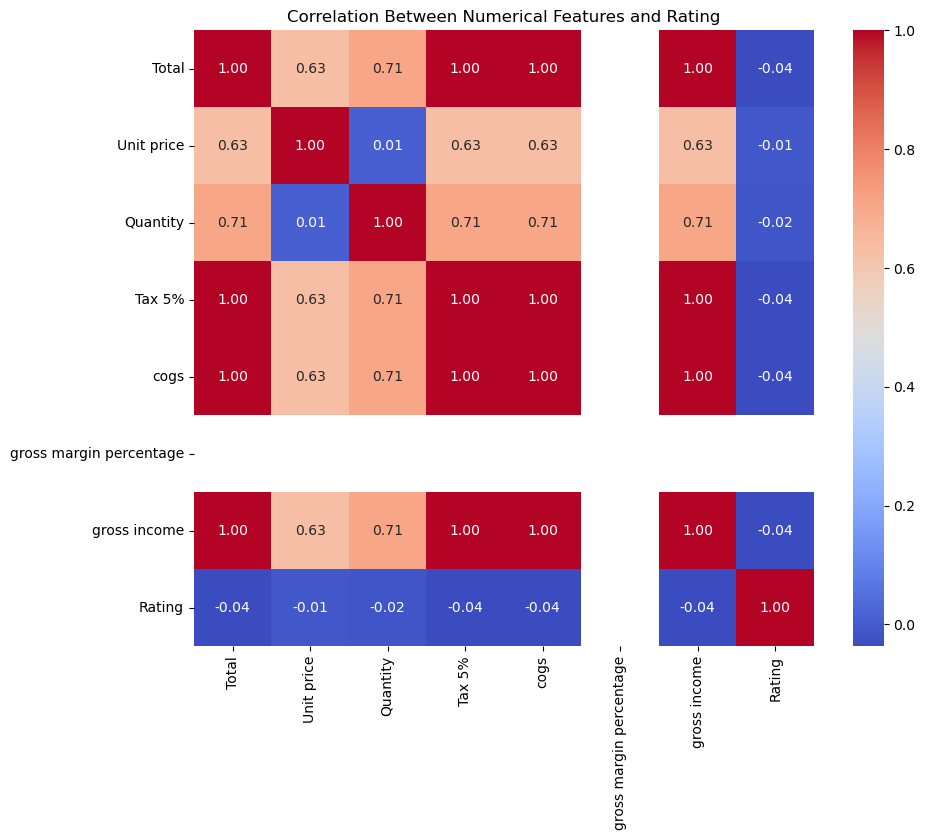

In [194]:
#Identify correlations between numerical features and customer ratings.

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features
numerical_features = ['Total', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 
                      'gross margin percentage', 'gross income']

corr_matrix = df[numerical_features + ['Rating']].corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features and Rating')
plt.show()


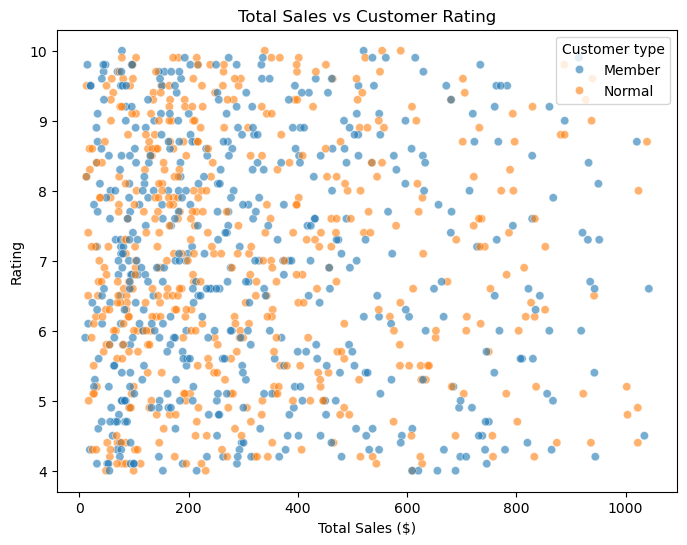

In [197]:
# Scatter plot for Total vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total', y='Rating', data=df, hue='Customer type', alpha=0.6)
plt.title('Total Sales vs Customer Rating')
plt.xlabel('Total Sales ($)')
plt.ylabel('Rating')
plt.show()

In [198]:
from scipy import stats

# Extract ratings for each product line
product_lines = df['Product line'].unique()
ratings_per_product = [df[df['Product line'] == pl]['Rating'] for pl in product_lines]

# Perform ANOVA
anova_product = stats.f_oneway(*ratings_per_product)
print(f'ANOVA Result for Product Line: F={anova_product.statistic:.2f}, p={anova_product.pvalue:.4f}')


ANOVA Result for Product Line: F=0.54, p=0.7461


In [209]:
# Separate ratings by customer type
members = df[df['Customer type'] == 'Member']['Rating']
normals = df[df['Customer type'] == 'Normal']['Rating']

# Perform T-test
t_stat, p_val = stats.ttest_ind(members, normals)
print(f'T-test Result for Customer Type: t={t_stat:.2f}, p={p_val:.4f}')



T-test Result for Customer Type: t=-0.60, p=0.5508


### Additional Insights

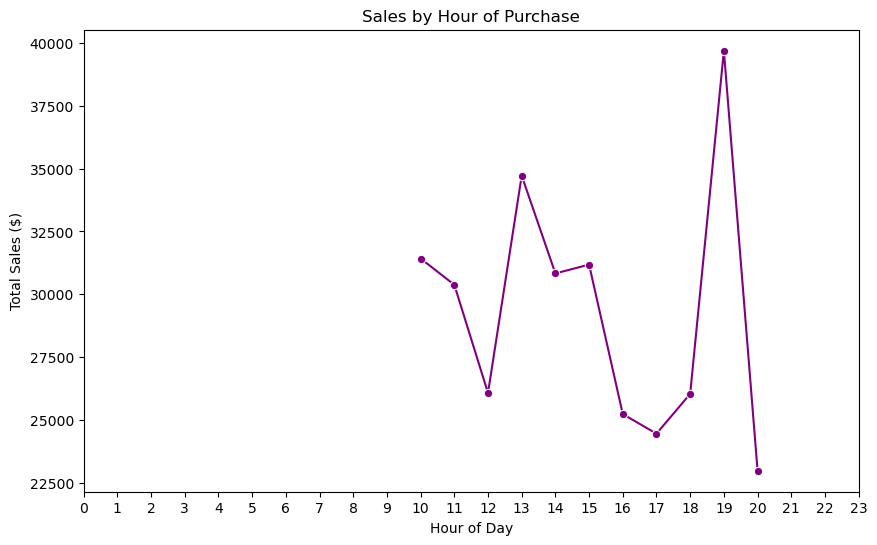

In [200]:
# Aggregate sales by hour
sales_by_hour = df.groupby('Hour')['Total'].sum().reset_index()

# Line plot for sales by hour
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Total', data=sales_by_hour, marker='o', color='purple')
plt.title('Sales by Hour of Purchase')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(range(0,24))
plt.show()
